<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EC%A3%BC%ED%83%9D%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_%EC%84%9C%EC%9A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###from : http://rtdown.molit.go.kr/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import pandas as pd


In [4]:
data_df = pd.read_csv('./아파트(매매)__실거래가_20220712230621.csv', encoding='cp949', header=15)

data_df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,0202,0,송정한신,39.080,202205,7,"16,000",10,1997,경강로2539번길 8,NaN,중개거래,강원 강릉시
1,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202205,24,"26,700",13,1997,경강로2539번길 8,NaN,중개거래,강원 강릉시
2,강원도 강릉시 견소동,289,0289,0,송정해변신도브래뉴아파트,84.990,202205,2,"33,800",14,2005,경강로2539번길 22,NaN,직거래,-
3,강원도 강릉시 견소동,289,0289,0,송정해변신도브래뉴아파트,84.990,202205,19,"33,700",3,2005,경강로2539번길 22,NaN,중개거래,강원 강릉시
4,강원도 강릉시 견소동,289,0289,0,송정해변신도브래뉴아파트,84.990,202205,23,"30,000",2,2005,경강로2539번길 22,NaN,직거래,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31781,충청북도 충주시 호암동,1063,1063,0,충주호암두진하트리움아파트,77.946,202205,27,"38,000",1,2019,호암수청2로 78,NaN,직거래,-
31782,충청북도 충주시 호암동,558-16,0558,16,한양,59.840,202205,10,"7,000",5,1994,예성로 9,NaN,중개거래,충북 충주시
31783,충청북도 충주시 호암동,547-6,0547,6,호반현대,59.760,202205,7,"12,000",10,1994,신촌2길 29,NaN,중개거래,충북 충주시
31784,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.680,202205,27,"19,800",1,2002,원호암5길 32,NaN,중개거래,충북 충주시


In [5]:
data_df.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지'],
      dtype='object')

##해제사유건 삭제

In [6]:
data_df = data_df.drop(index=data_df[data_df['해제사유발생일'].notnull()].index)

In [7]:
data_df[data_df['해제사유발생일'].notnull()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지


##필요 컬럼만 사용과 단위 처리

In [8]:
columns = ['시군구', '전용면적(㎡)', '거래금액(만원)', '층', '건축년도']
contents_df = data_df[columns].copy()
contents_df.head()

,시군구,전용면적(㎡),거래금액(만원),층,건축년도
0,강원도 강릉시 견소동,39.080,"16,000",10,1997
1,강원도 강릉시 견소동,84.945,"26,700",13,1997
2,강원도 강릉시 견소동,84.990,"33,800",14,2005
3,강원도 강릉시 견소동,84.990,"33,700",3,2005
4,강원도 강릉시 견소동,84.990,"30,000",2,2005


In [9]:
contents_df.dtypes

시군구          object
전용면적(㎡)     float64
거래금액(만원)     object
층             int64
건축년도          int64
dtype: object

In [10]:
contents_df['전용면적'] = contents_df['전용면적(㎡)'].astype('int32')

In [11]:
contents_df['거래금액'] = contents_df['거래금액(만원)'].str.replace(',','').astype('int64')

##관심 지역 매매가 분석

In [12]:
contents_df['시도'] = contents_df['시군구'].str.split(' ').str[0]
contents_df['시도'].nunique(), contents_df['시도'].unique(), 

(17, array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
        '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
        '충청남도', '충청북도'], dtype=object))

In [13]:
area = '서울특별시'
square_size = 84
condition = (contents_df['시도'] == area) & (contents_df['전용면적'] == square_size)
curious_area = contents_df[condition].copy()
curious_area

,시군구,전용면적(㎡),거래금액(만원),층,건축년도,전용면적,거래금액,시도
19262,서울특별시 강남구 논현동,84.9400,"172,500",2,2004,84,172500,서울특별시
19273,서울특별시 강남구 대치동,84.4300,"277,000",13,1979,84,277000,서울특별시
19283,서울특별시 강남구 도곡동,84.9984,"313,000",3,2006,84,313000,서울특별시
19287,서울특별시 강남구 도곡동,84.8300,"225,000",11,1986,84,225000,서울특별시
19291,서울특별시 강남구 도곡동,84.9700,"235,500",7,1995,84,235500,서울특별시
...,...,...,...,...,...,...,...,...
20875,서울특별시 중랑구 면목동,84.0900,"75,000",3,1994,84,75000,서울특별시
20879,서울특별시 중랑구 묵동,84.0800,"76,000",5,1999,84,76000,서울특별시
20885,서울특별시 중랑구 묵동,84.8900,"82,000",9,1998,84,82000,서울특별시
21030,서울특별시 중랑구 신내동,84.9700,"68,500",5,1996,84,68500,서울특별시


In [14]:
curious_area['구'] = curious_area['시군구'].str.split(' ').str[1]
curious_area['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

###박스플롯 시각화



In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [16]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [17]:
gu_names_list = curious_area['구'].unique()

In [18]:
gus_list = list()
for gu_name in gu_names_list:
  gus_list.append(curious_area.groupby('구')['거래금액'].get_group(gu_name))

In [19]:
len(gus_list), type(gus_list[0]), gus_list[0]

(25, pandas.core.series.Series, 19262    172500
 19273    277000
 19283    313000
 19287    225000
 19291    235500
 19299    270000
 19303    275000
 19304    275000
 19307    187000
 19313    264000
 19315    201000
 19318    186500
 19322    103000
 19325    430000
 19329    250000
 19338    230000
 19343    180000
 19344    159000
 19348    245000
 19350    288000
 Name: 거래금액, dtype: int64)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


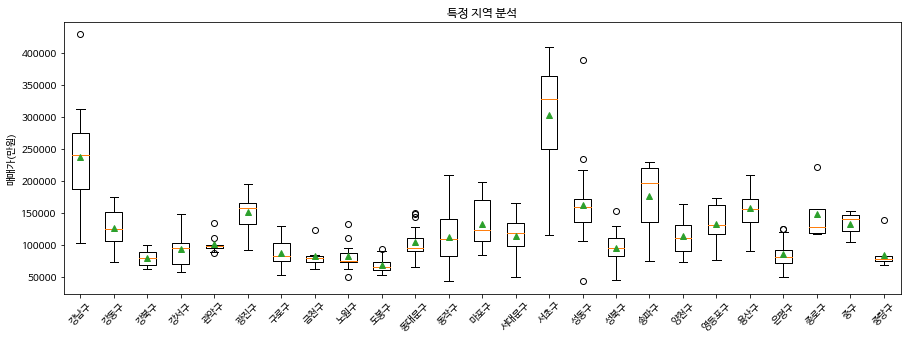

In [20]:
plt.rcParams['figure.figsize'] = (15,5)
plt.boxplot(gus_list, labels=gu_names_list, showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('매매가(만원)')
plt.title('특정 지역 분석')
plt.show()

##평균 매매가, 거래건수

In [22]:
curious_area_means = round(curious_area.groupby('구')['거래금액'].mean(), 1)
curious_area_means

구
강남구     238325.0
강동구     126687.0
강북구      79500.0
강서구      93012.5
관악구     100985.0
광진구     151200.0
구로구      86854.5
금천구      82800.0
노원구      81954.5
도봉구      68876.3
동대문구    104019.0
동작구     112410.0
마포구     132333.3
서대문구    113550.0
서초구     303615.8
성동구     162478.3
성북구      95677.3
송파구     177272.7
양천구     113681.8
영등포구    133100.0
용산구     157777.8
은평구      85986.7
종로구     148625.0
중구      132500.0
중랑구      84625.0
Name: 거래금액, dtype: float64

In [26]:
curious_area_counts = curious_area.groupby('구')['거래금액'].count()
curious_area_counts.sort_values(ascending=False)

구
성동구     23
강동구     23
송파구     22
성북구     22
구로구     22
동대문구    21
강남구     20
동작구     20
서초구     19
도봉구     19
서대문구    18
마포구     18
강서구     16
은평구     15
영등포구    12
노원구     11
광진구     11
양천구     11
관악구     10
용산구      9
중랑구      8
금천구      7
강북구      7
종로구      4
중구       3
Name: 거래금액, dtype: int64

In [29]:
curious_area_df = pd.concat([curious_area_means, curious_area_counts], axis=1)
curious_area_df

,거래금액,거래금액
구,,
강남구,238325.0,20
강동구,126687.0,23
강북구,79500.0,7
강서구,93012.5,16
관악구,100985.0,10
광진구,151200.0,11
구로구,86854.5,22
금천구,82800.0,7
노원구,81954.5,11


In [37]:
curious_area_df.columns = ['mean', 'count']
curious_area_df.sort_values('mean', ascending=False, inplace=True)

###시각화

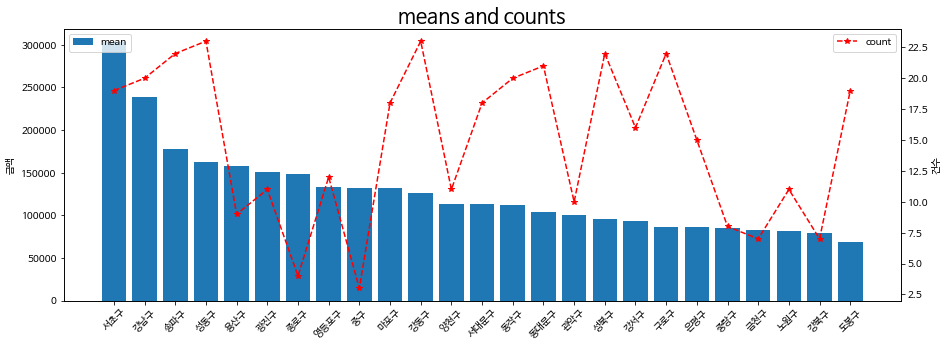

In [47]:
fig, ax_left = plt.subplots()
ax_left.bar(curious_area_df.index, curious_area_df['mean'], label='mean')
plt.xticks(rotation=45)
ax_left.legend(loc='upper left')
ax_left.set_ylabel('금액')

ax_right = ax_left.twinx()
ax_right.plot(curious_area_df['count'], 'r*--', label='count')
ax_right.legend(loc='upper right')
ax_right.set_ylabel('건수')

plt.title('means and counts', size=20)
plt.show()